In [ ]:
# standard packages 
import pandas as pd # for DataFrame and data manipulation
import numpy as np  # provides array objects for calculations

# visualization packages 
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # create a wordcloud
from PIL import Image # pillow with WordCloud to image manipulation
import matplotlib.gridspec as gridspec

# Sentiment Analysis packages
import tensorflow as tf # tensorflow 
from tensorflow import keras # Neural Network API
import sklearn # machine learning 
import nltk # natural language toolkit 
import re # search for particular string 
from sklearn.model_selection import train_test_split # split data into test and train data

# for building model 
from keras import layers, models # help build the model 
from keras.callbacks import EarlyStopping #Stop training at threshold 
from keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout # building model 
from keras.models import  Sequential # to create a model 

# preprocessing data 
from keras.preprocessing.text import Tokenizer # convert text to tokens 
from nltk.corpus import stopwords # to remove common words 
from nltk.stem import WordNetLemmatizer, PorterStemmer # to consolidate words 
from nltk.probability import FreqDist # to search for frequent words 
from tensorflow.keras.preprocessing.sequence import pad_sequences # keep each review a certain length 

# for date
import datetime

# downloads needed for packages above 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# to ignore warnings that might occur 
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# file path 
file = '/content/drive/MyDrive/drugsComTrain_raw.csv'

# read in data 
df = pd.read_csv(file)

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.shape

(161297, 7)

In [ ]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [ ]:
df.describe()

,uniqueID,rating,usefulCount
count,160398.000000,160398.000000,160398.000000
mean,115957.147309,6.995923,28.097613
std,67015.899492,3.272303,36.457876
min,2.000000,1.000000,0.000000
25%,58065.250000,5.000000,6.000000
50%,115845.500000,8.000000,16.000000
75%,173826.750000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.8+ MB


In [ ]:
# convert objects to string 
df['drugName'] = df['drugName'].astype(str)
df['condition'] = df['condition'].astype(str)
df['review'] = df['review'].astype(str)

In [ ]:
# view df with more display for review 
pd.set_option('display.max_colwidth', 5000)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37


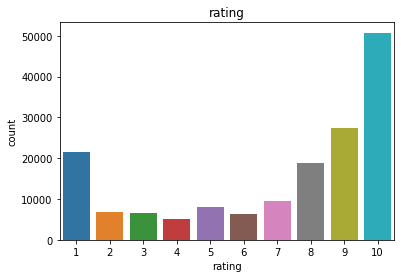

In [ ]:
# look at the range of reviews 
sns.countplot(data=df, x='rating')
plt.title('rating')
plt.show()

In [ ]:
# drop median reviews, only positive and negative 
df = df[df['rating'] !=5]
df.shape

(152439, 7)

In [ ]:
# 6-10 is labeled as 1, 4 and below is labeled as 0 
def label(i):
  return 1 if i >=6 else 0
df['label'] = df['rating'].apply(label)
df['label'].value_counts()

1    112611
0     39828
Name: label, dtype: int64

In [ ]:
# drop original rating, now that we have label 
df = df.drop(['rating'], axis=1)

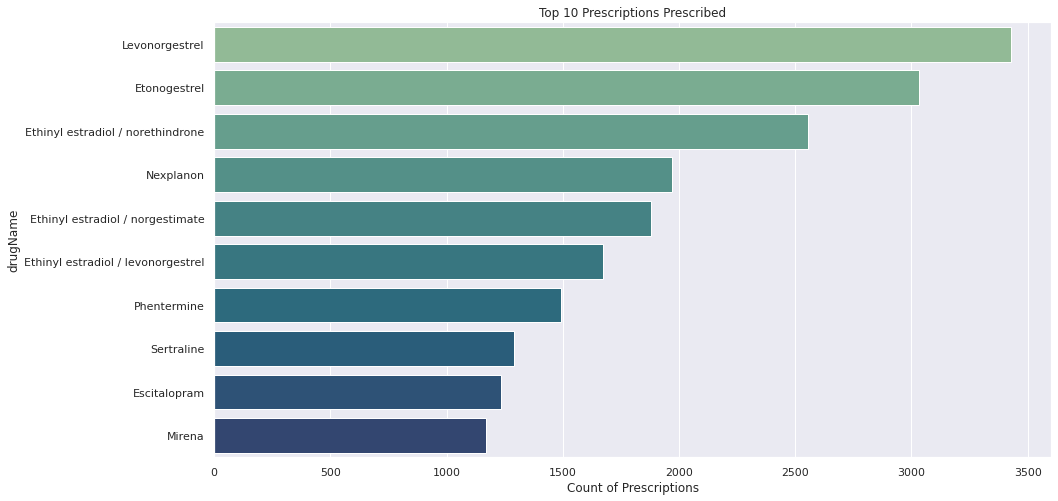

In [ ]:
# top 10 prescriptions 
sns.set(rc={"figure.figsize":(15,8)})
sns.countplot(data=df, y = 'drugName', palette='crest', order=df.drugName.value_counts().iloc[:10].index)
plt.xlabel('Count of Prescriptions')
plt.title('Top 10 Prescriptions Prescribed')
plt.show()

In [ ]:
#lets check the number of drugs/condition
df.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(50)

condition
Not Listed / Othe                             211
Pain                                          196
Birth Control                                 170
High Blood Pressure                           138
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Osteoarthritis                                 80
Bipolar Disorde                                79
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Psoriasis                                      58
Migraine                                       58
Endometriosis                                  55
ADHD                                           55
Asthma, Maintenance                            54
3</span> users found this comment helpfu

In [ ]:
nan_condition = df[df['condition'].str.contains('nan') | df['condition'].str.contains('Not Listed')].index
noisy = df[df['condition'].str.contains("found this comment helpful.")].index

df.drop(noisy, inplace=True)
df.drop(nan_condition, inplace=True)
#lets check the number of drugs/condition
df.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(50)

condition
Pain                            196
Birth Control                   170
High Blood Pressure             138
Acne                            117
Depression                      105
Rheumatoid Arthritis             98
Diabetes, Type 2                 89
Allergic Rhinitis                88
Osteoarthritis                   80
Bipolar Disorde                  79
Anxiety                          78
Insomnia                         78
Abnormal Uterine Bleeding        74
Migraine                         58
Psoriasis                        58
ADHD                             55
Endometriosis                    55
Chronic Pain                     53
Major Depressive Disorde         49
Irritable Bowel Syndrome         49
Migraine Prevention              49
Urinary Tract Infection          47
ibromyalgia                      45
Postmenopausal Symptoms          44
Bronchitis                       44
HIV Infection                    43
GERD                             43
Headache          

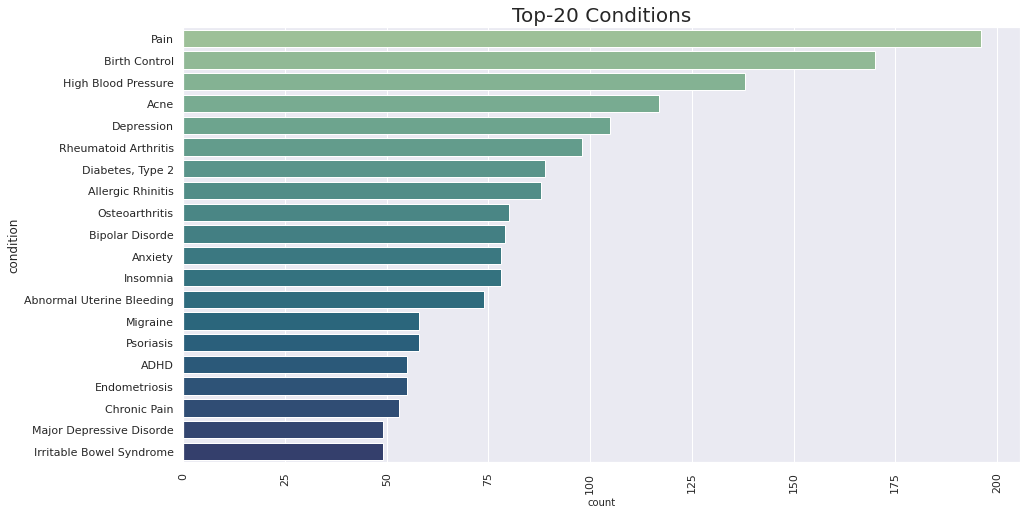

In [ ]:

conditions_gp = df.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(y = condition_gp_top_20.index, x = condition_gp_top_20.values, palette='crest')
plt.title('Top-20 Conditions',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('count',fontsize=10)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()
df.drop(['date'], axis=1, inplace=True)

df['month'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                  ['January','February','March','April','May','June',
                                   'July','August','September','October','November','December'])
df.head()

,uniqueID,drugName,condition,review,usefulCount,label,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",27,1,May,Sunday
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",192,1,April,Tuesday
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",10,1,November,Tuesday
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",37,1,November,Sunday
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!""",43,0,November,Saturday


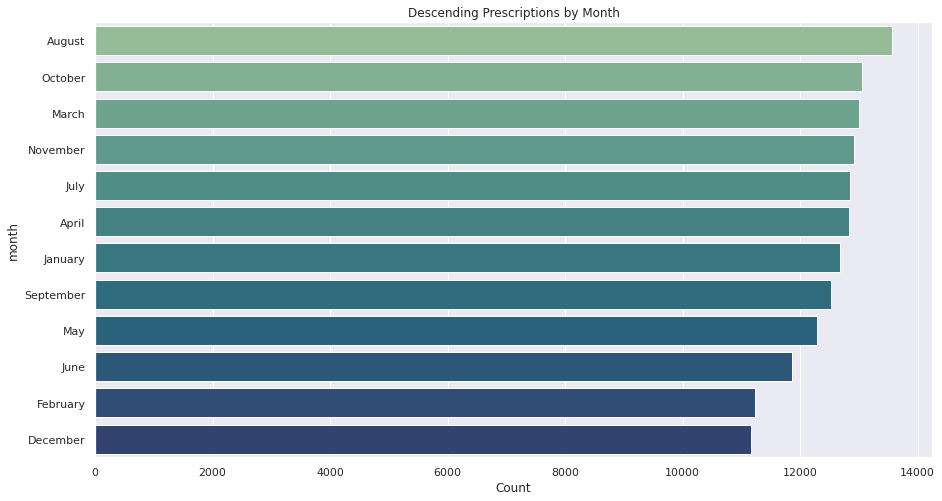

In [ ]:
# prescriptions by month
sns.set(rc={"figure.figsize":(15, 8)})
sns.countplot(data=df, y='month', palette='crest',order=df.month.value_counts().index)
plt.xlabel('Count')
plt.title('Descending Prescriptions by Month')
plt.show()

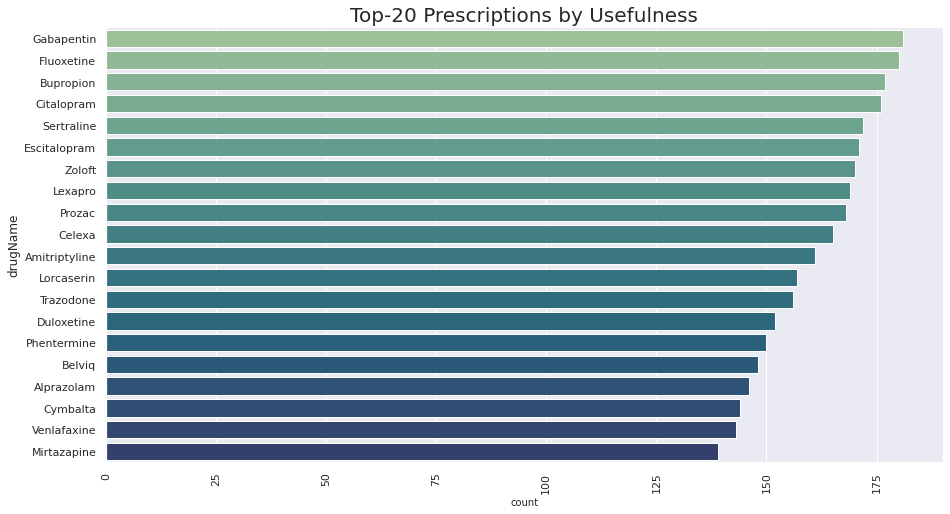

In [ ]:
# how useful reviews are by prescription 
#lets check the number of drugs present in our dataset condition wise
useful_gp = df.groupby('drugName')['usefulCount'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
useful_gp_top_20 = useful_gp.head(20)
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(y = useful_gp_top_20.index, x = useful_gp_top_20.values, palette='crest')
plt.title('Top-20 Prescriptions by Usefulness',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('count',fontsize=10)
plt.show()

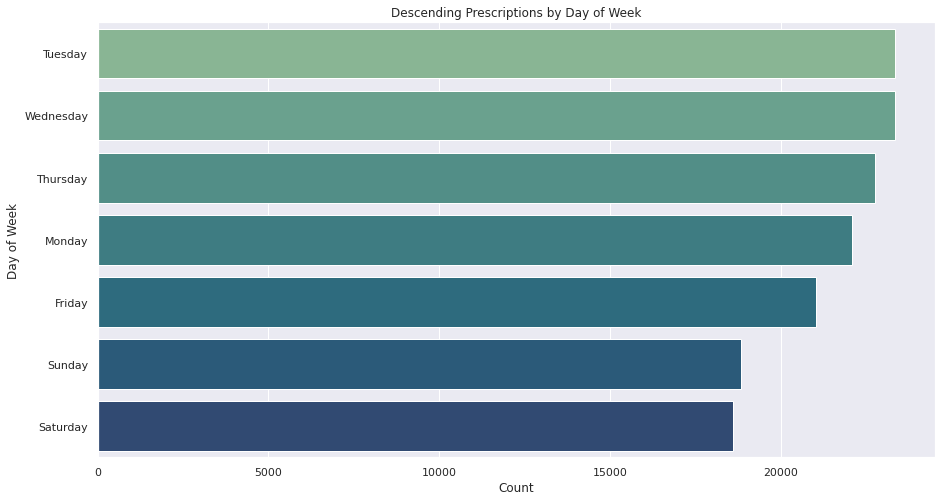

In [ ]:
# prescriptions by day 
sns.set(rc={"figure.figsize":(15, 8)})
sns.countplot(data=df, y='day', palette='crest',order=df.day.value_counts().index)
plt.xlabel('Count')
plt.ylabel('Day of Week')
plt.title('Descending Prescriptions by Day of Week')
plt.show()

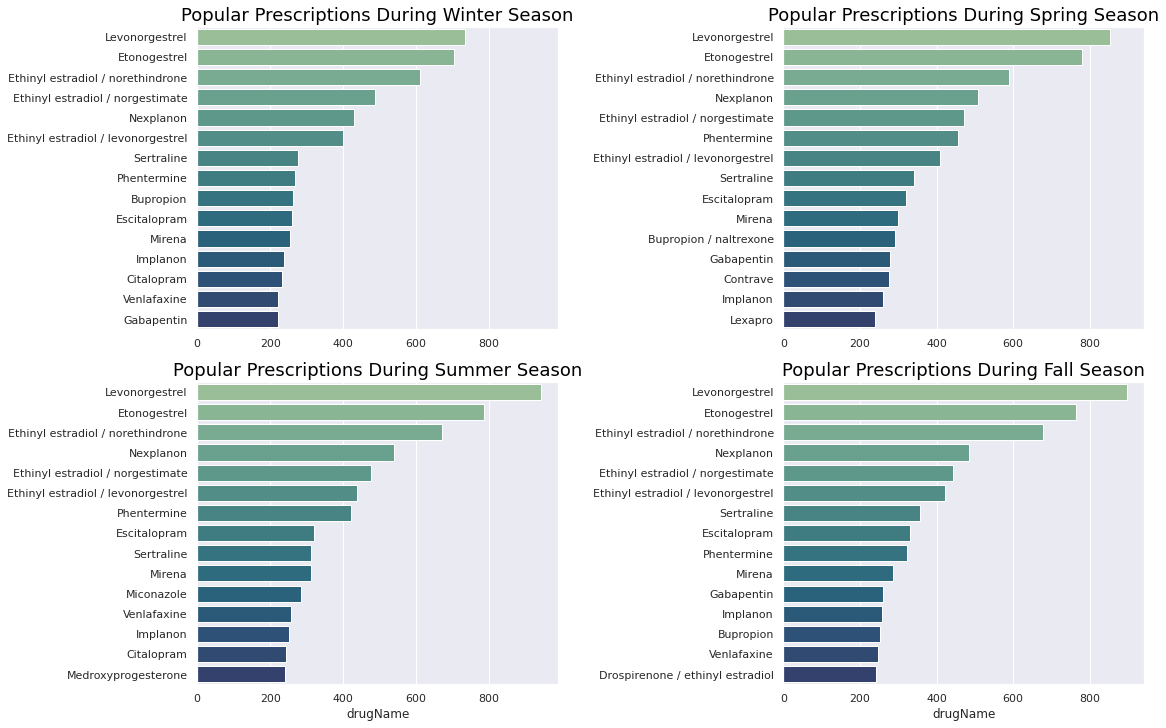

In [ ]:
winter = df[(df.month=='January') | (df.month=='February') | (df.month=='December')]
spring = df[(df.month=='March') | (df.month=='April') | (df.month=='May')]
summer = df[(df.month=='June') | (df.month=='July') | (df.month=='August')]
fall = df[(df.month=='September') | (df.month=='October') | (df.month=='November')]

s = ['Winter', 'Spring', 'Summer', 'Fall']
season = [winter, spring, summer, fall]

fig = plt.figure(figsize=(16,10), constrained_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax3, ax4 = fig.add_subplot(spec[1,0]), fig.add_subplot(spec[1,1])
ax1, ax2 = fig.add_subplot(spec[0,0], sharex=ax3), fig.add_subplot(spec[0,1], sharex=ax4)
ax = [ax1, ax2, ax3, ax4]

for i, j, k in zip(season, ax, s):
    sns.barplot(y=i.drugName.value_counts().head(15).index,
                x=i.drugName.value_counts().head(15),orient='h', ax=j, palette='crest')
    j.set_title('Popular Prescriptions During {} Season'.format(k), color='black', fontsize=18)

ax1.set_xlabel('')
ax2.set_xlabel('')

plt.show()

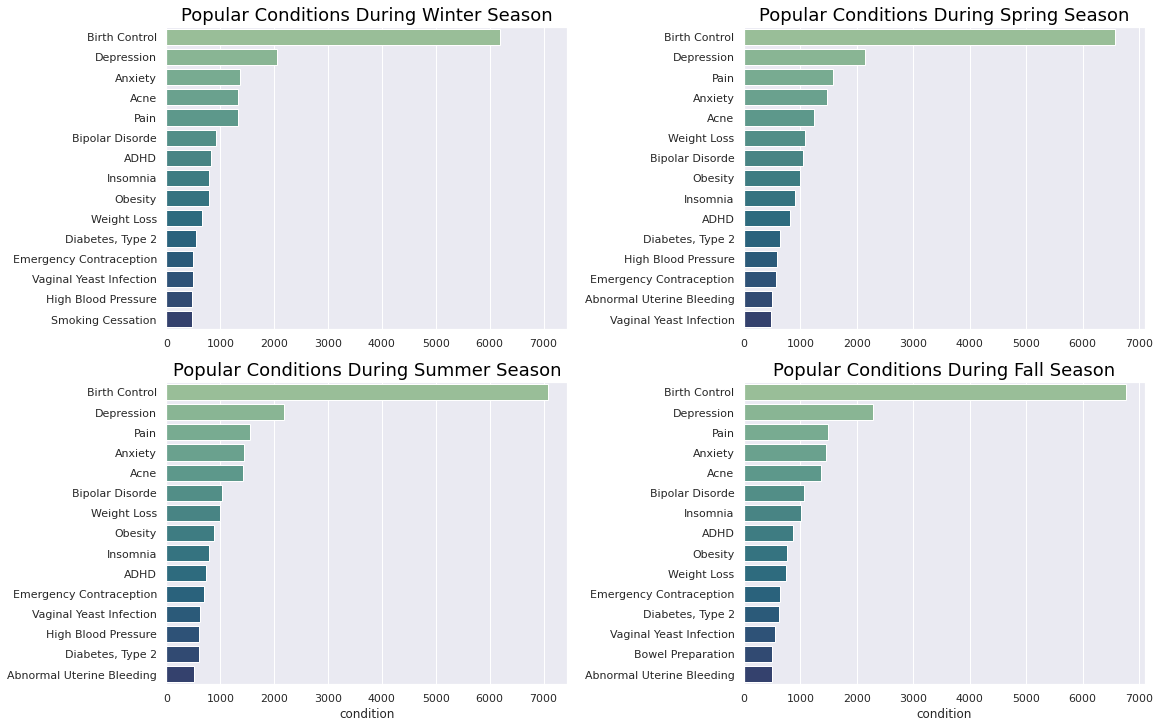

In [ ]:
fig = plt.figure(figsize=(16,10), constrained_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax3, ax4 = fig.add_subplot(spec[1,0]), fig.add_subplot(spec[1,1])
ax1, ax2 = fig.add_subplot(spec[0,0], sharex=ax3), fig.add_subplot(spec[0,1], sharex=ax4)
ax = [ax1, ax2, ax3, ax4]

for i, j, k in zip(season, ax, s):
    sns.barplot(y=i.condition.value_counts().head(15).index,
                x=i.condition.value_counts().head(15),orient='h', ax=j, palette='crest')
    j.set_title('Popular Conditions During {} Season'.format(k), color='black', fontsize=18)

ax1.set_xlabel('')
ax2.set_xlabel('')

plt.show()

In [ ]:
# length of review 
df['review_length']=df['review'].str.len()

In [ ]:
# average length 
df['review_length'].sum()/len(df)

459.03120729081246

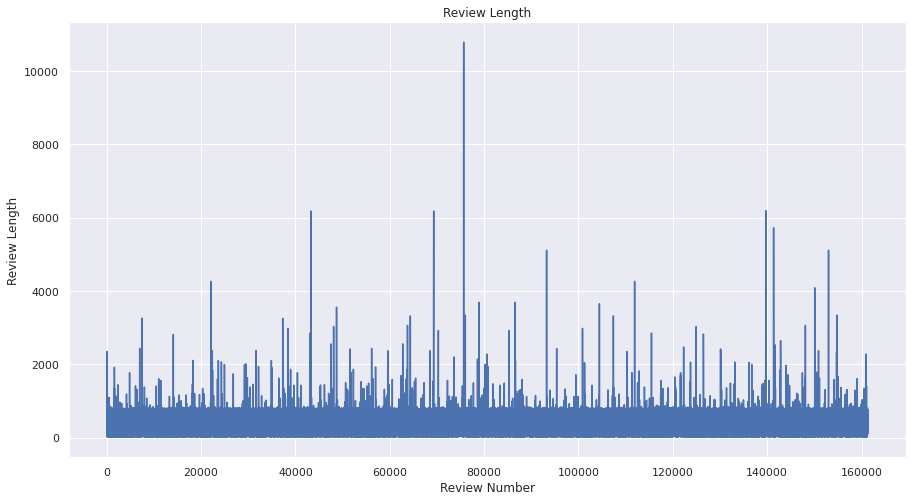

In [ ]:
df['review_length'].plot.line()
plt.title('Review Length')
plt.xlabel('Review Number')
plt.ylabel('Review Length')
plt.show()

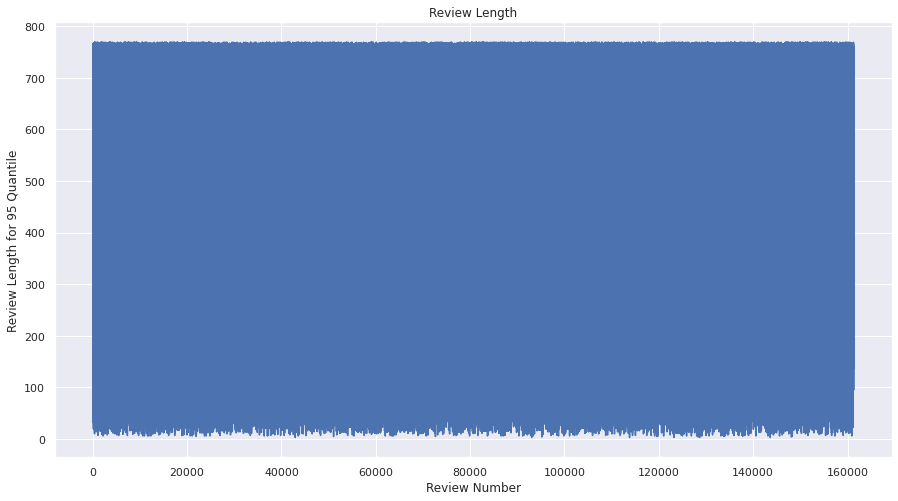

In [ ]:
quantile_95 = df['review_length'].quantile(0.95)
df_95 = df[df['review_length'] < quantile_95]

df_95['review_length'].plot.line()
plt.title('Review Length')
plt.xlabel('Review Number')
plt.ylabel('Review Length for 95 Quantile')
plt.show()

In [ ]:
quantile_95

770.0

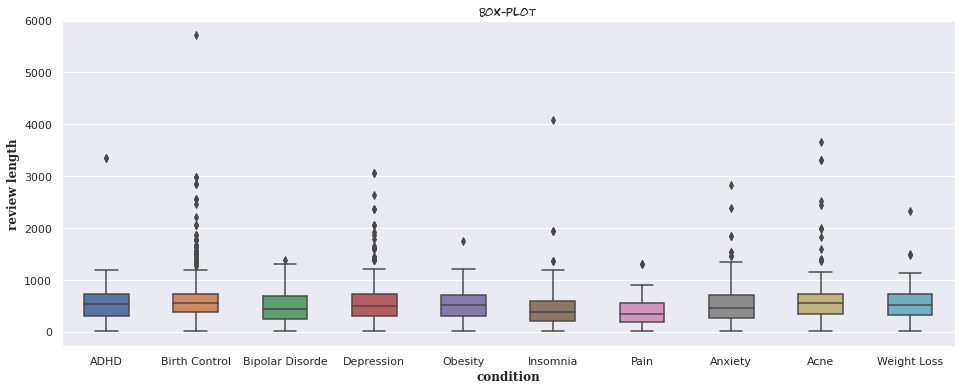

In [ ]:
#box-plot
# review length for top 10 conditions, all data

top_10=df["condition"].value_counts().sort_values(ascending=False)[:10]
top_10_df=df.loc[df["condition"].isin(top_10.index), :]

plt.figure(figsize=(16,6))
sns.boxplot(data=top_10_df, x='condition', y='review_length', width=.5)
plt.title("Box-plot", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("review length", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("condition", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Text(0.5, 0, 'condition')

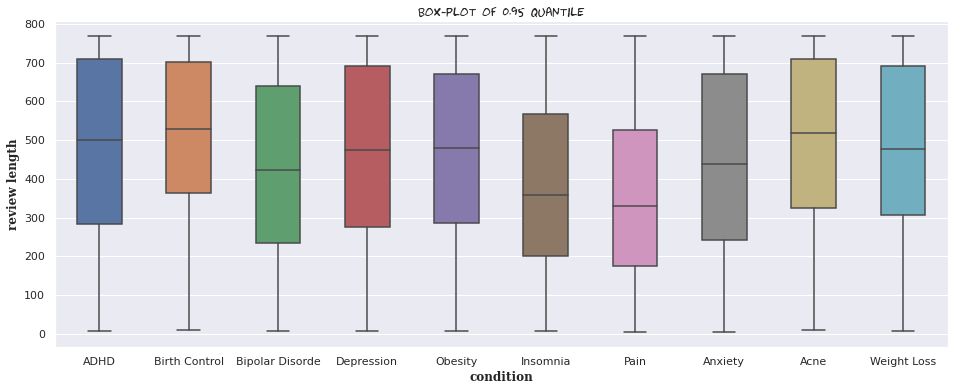

In [ ]:
#box-plot
# review length for top 10 conditions in 95 quantile 

top_10_version2=df_95["condition"].value_counts().sort_values(ascending=False)[:10]
top_10_version2_df=df_95.loc[df_95["condition"].isin(top_10.index), :]

plt.figure(figsize=(16,6))
sns.boxplot(data=top_10_version2_df, x='condition', y='review_length', width=.5)
plt.title("Box-plot of 0.95 quantile", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("review length", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("condition", {"fontname": "serif", "fontweight":"bold"})
plt.show()

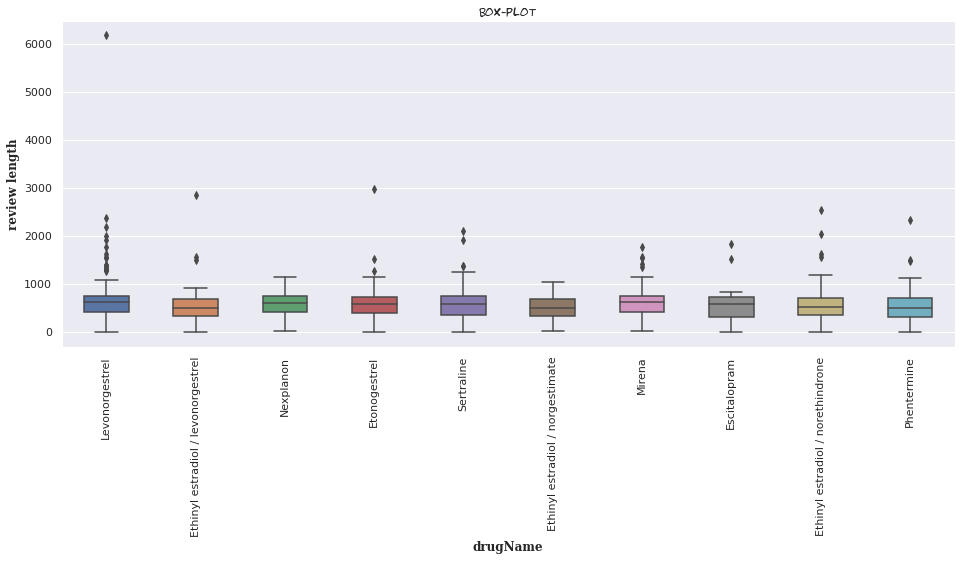

In [ ]:
#box-plot
# review length for top 10 med, all data 

top_10=df["drugName"].value_counts().sort_values(ascending=False)[:10]
top_10_df=df.loc[df["drugName"].isin(top_10.index), :]

plt.figure(figsize=(16,6))
sns.boxplot(data=top_10_df, x='drugName', y='review_length', width=.5)
plt.title("Box-plot", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("review length", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("drugName", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation = 90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

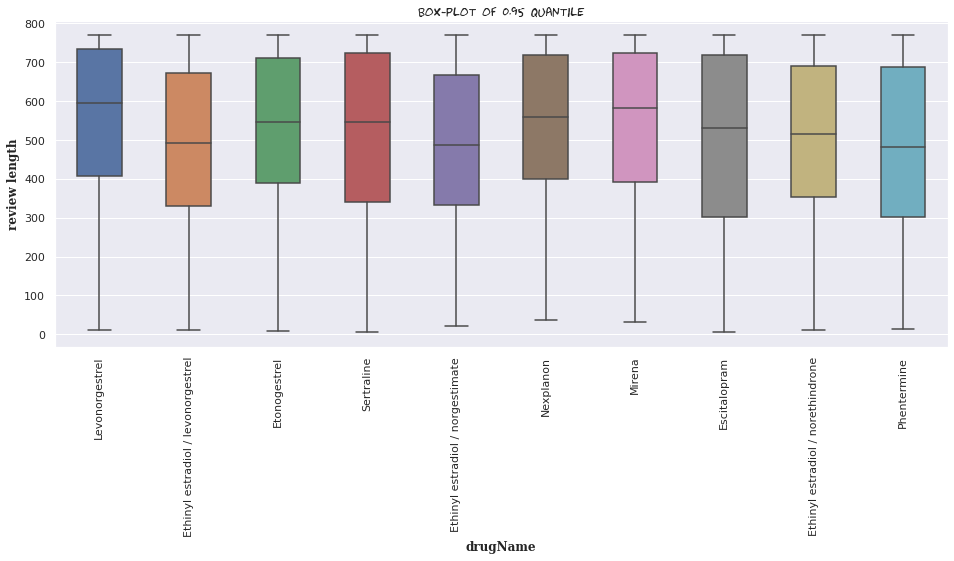

In [ ]:
# box plot 
# review length for top 10 meds, 95 quantile 
top_10_version2=df_95["drugName"].value_counts().sort_values(ascending=False)[:10]
top_10_version2_df=df_95.loc[df_95["drugName"].isin(top_10.index), :]

plt.figure(figsize=(16,6))
sns.boxplot(data=top_10_version2_df, x='drugName', y='review_length', width=.5)
plt.title("Box-plot of 0.95 quantile", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("review length", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("drugName", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

In [ ]:
# only need certain columns for sentiment 
df = df[['drugName', 'condition', 'review', 'label']]

In [ ]:
# for preprocessing 
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('', text)

def preprocess_text(text):

  t = remove_tags(text) # remove html 

  t = re.sub('[^a-zA-Z]', ' ', t) # remove punctuation and numbers 

  t = re.sub(r'\s+[a-zA-Z]\s', ' ', t) # remove single characters 

  t = re.sub(r'\s+', ' ', t) # remove spaces 
  
  t = t.lower() 
  
  return t 

# run process on each column
df['final_review'] = df['review'].apply(lambda x: preprocess_text(x))
df['condition'] = df['condition'].apply(lambda x: preprocess_text(x))
df['drug'] = df['drugName'].apply(lambda x: preprocess_text(x))

df.head(2)

,drugName,condition,review,label,final_review,drug
0,Valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",1,it has no side effect take it in combination of bystolic mg and fish oil,valsartan
1,Guanfacine,adhd,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",1,my son is halfway through his fourth week of intuniv we became concerned when he began this last week when he started taking the highest dose he will be on for two days he could hardly get out of bed was very cranky and slept for nearly hours on drive home from school vacation very unusual for him called his doctor on monday morning and she said to stick it out few days see how he did at school and with getting up in the morning the last two days have been problem free he is much more agreeable than ever he is less emotional good thing less cranky he is remembering all the things he should overall his behavior is better we have tried many different medications and so far this is the most effective,guanfacine


In [ ]:
# remove original review and drugname 
df = df.drop(['review', 'drugName'], axis=1)
df.head(2)

,condition,label,final_review,drug
0,left ventricular dysfunction,1,it has no side effect take it in combination of bystolic mg and fish oil,valsartan
1,adhd,1,my son is halfway through his fourth week of intuniv we became concerned when he began this last week when he started taking the highest dose he will be on for two days he could hardly get out of bed was very cranky and slept for nearly hours on drive home from school vacation very unusual for him called his doctor on monday morning and she said to stick it out few days see how he did at school and with getting up in the morning the last two days have been problem free he is much more agreeable than ever he is less emotional good thing less cranky he is remembering all the things he should overall his behavior is better we have tried many different medications and so far this is the most effective,guanfacine


In [ ]:
# tokenize 
df['final_review'] = df.apply(lambda x: nltk.word_tokenize(x['final_review']), axis=1)
df['condition'] = df.apply(lambda x: nltk.word_tokenize(x['condition']), axis=1)
df['drug'] = df.apply(lambda x: nltk.word_tokenize(x['drug']), axis=1)


In [ ]:
# stopwords 
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  t = [word for word in text if word not in stopwords] 
  return t

# new column is updated token review, removing all invaluable words
df['final_review'] = df['final_review'].apply(lambda x: remove_stopwords(x)).apply(lambda x: ' '.join(x))
df['condition'] = df['condition'].apply(lambda x: remove_stopwords(x)).apply(lambda x: ' '.join(x))
df['drug'] = df['drug'].apply(lambda x: remove_stopwords(x)).apply(lambda x: ' '.join(x))

In [ ]:
# lemmatize 
wordnet_l = WordNetLemmatizer()
# update final review
df['final_review'] = df['final_review'].apply(wordnet_l.lemmatize)
df['condition'] = df['condition'].apply(wordnet_l.lemmatize)
df['drug'] = df['drug'].apply(wordnet_l.lemmatize)

[('day', 53844), ('side', 49868), ('taking', 47310), ('years', 44044), ('mg', 43134), ('pain', 42731), ('effects', 42032), ('first', 41657), ('take', 41251), ('months', 39644), ('started', 39045), ('like', 38943), ('get', 38441), ('days', 37629), ('time', 36125), ('feel', 33042), ('would', 31496), ('back', 29295), ('pill', 28582), ('one', 28308)]


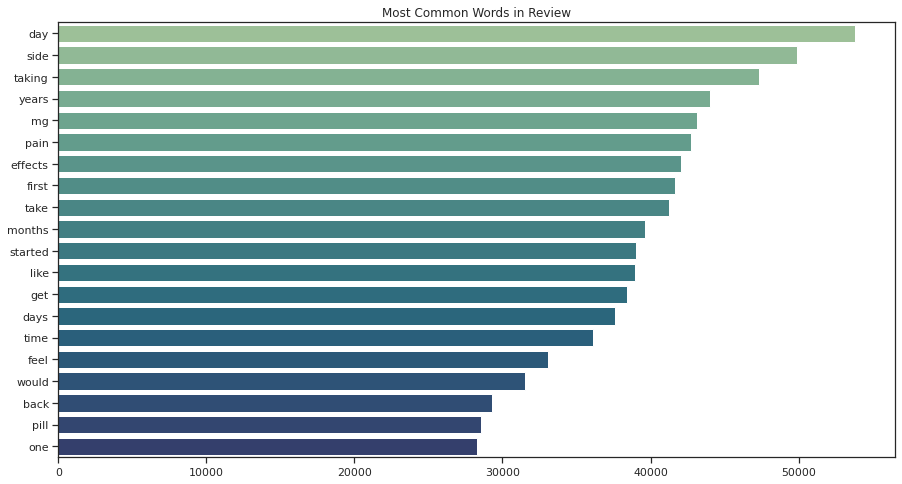

In [ ]:
# find most common words in review 
n_common = 20 
all_words = ' '.join(x for x in df.final_review)
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
top_x = fd.most_common(n_common)
fdist = pd.Series(dict(top_x))
sns.set_theme(style='ticks')
sns.barplot(y=fdist.index, x=fdist.values, palette='crest')
print(fd.most_common(n_common))
plt.title('Most Common Words in Review')
plt.show()

In [ ]:
# to change shape of wordcloud into the caduceus
mask = np.array(Image.open(r'/content/drive/MyDrive/medical.png'))


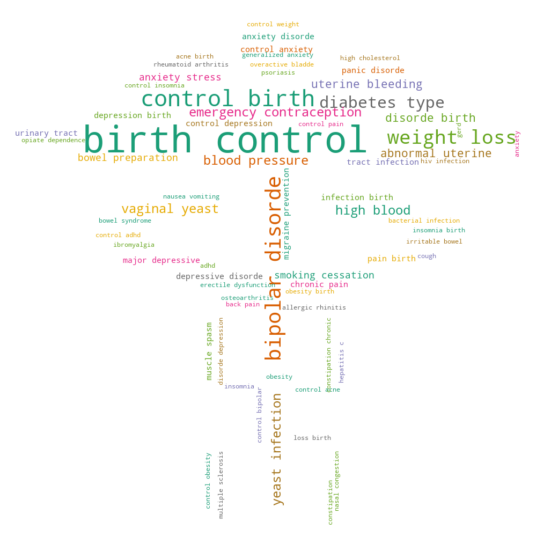

In [ ]:
# word cloud for condition 

all_words = ' '.join(x for x in df.condition)

wordcloud = WordCloud(
                      scale=3,
                      mask=mask,
                      width=mask.shape[1],
                      height=mask.shape[0],
                      colormap='Dark2', 
                      background_color='white',
                      ).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
# to change wordcloud shape into a prescription bottle 
mask = np.array(Image.open(r'/content/drive/MyDrive/pillbottle.png')) 

# change the value of image to pure white 
def transform_num(val):
  if val == 1:
    return 255
  else:
    return val
 

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    maskable_image[i] = list(map(transform_num, mask[i]))


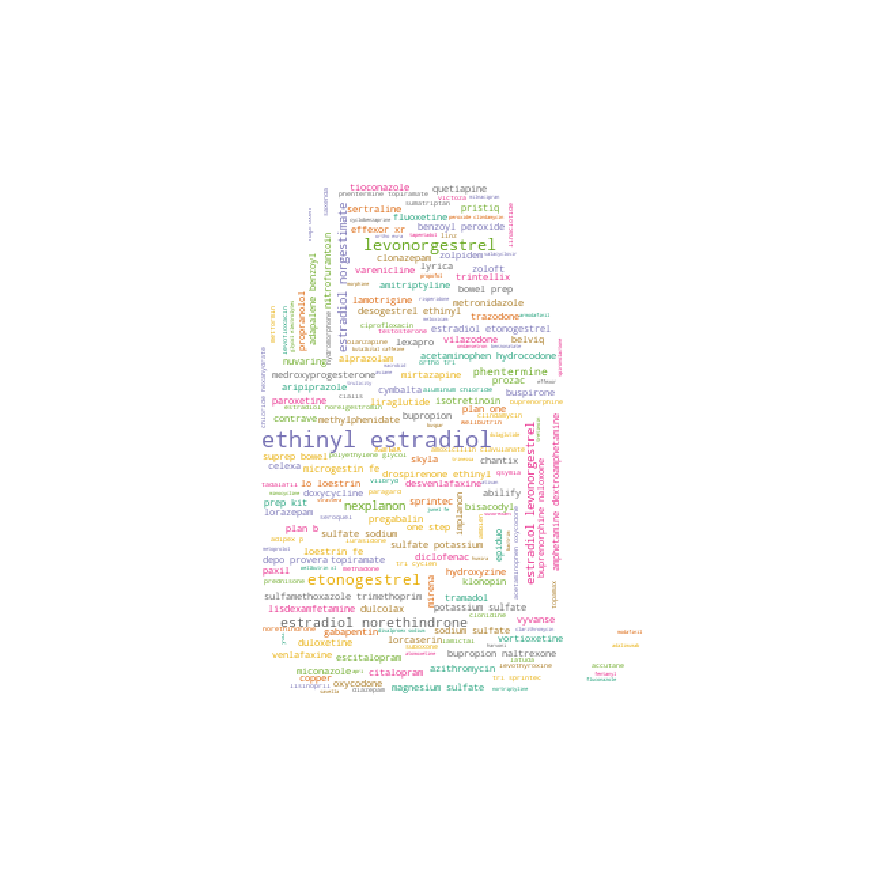

In [ ]:
# wordcloud for prescription 


all_words = ' '.join(x for x in df.drug)
wordcloud = WordCloud(mask=maskable_image,
                      
                      width=mask.shape[1],
                      height=mask.shape[0],
                      random_state=2, 
                      colormap='Dark2',
                      background_color='white',
         
                      )
plt.figure(figsize=(20,16))
wordcloud.generate(all_words)
plt.imshow(wordcloud, interpolation='None')
plt.axis('off')
plt.show()

In [ ]:
# show a random 5 
df.sample(5, random_state=0)

,condition,label,final_review,drug
120192,onychomycosis toenail,1,see results months start taking patient works might refill times go six months works takes time first time killed second time third round almost gone,lamisil
61413,epilepsy,1,diagnosed absence seizures years taking depakote er seizure free years severe migraines usually times intense stress doctor prescribed tegretol take needed year ago always effective side effect makes drowsy,carbamazepine
127241,bipolar disorde,0,daughter took lamictal bipolar condition titrated instructed psychiatrist weeks eyes became irritated developed white sores inside mouth followed life threatening rash put hospital weeks touch go weeks diagnosed sjs turned ten amniotic membrane surgically placed eyes protection unable see weeks medication worth risk,lamotrigine
95210,birth control,1,think greatest choice made terms health switching oral contraceptives iud want state women react differently varying forms birth control skyla releases hormones locally reproductive organs within two months switching forms iud noticed weight loss systemic effects manageable hair less dry skin never terrible issues acne oral birth control really dried skin saved hundreds birth control subsidized covered health insurance peace mind due take pill every day paid actual device preparation insertion,levonorgestrel
157311,abnormal uterine bleeding,1,got mirena put today procedure took less mins painful others say would definitely recommend taking ibuprofen mild cramping could go back work today rather enjoy day go back tomorrow maybe true kids hurt much two children vaginally hope helps someone also little spotting procedure wear panty liner keep posted,mirena


In [ ]:
df.shape

(149997, 4)

In [ ]:
# for later use 
data = df[['drug', 'label']]
data2 = df[['condition', 'drug']]

# copy to csv to use in other notebook to save memory
data.to_csv('drug_analysis.csv')
data2.to_csv('condition_analysis.csv')

In [ ]:
# combine review, condition, and drug into one big review 
df['review'] = df[['final_review', 'condition', 'drug']].apply(' '.join, axis=1)

# remove the unneeded columns 
df = df.drop(['final_review', 'condition', 'drug'], axis=1)

# show new data
df.head()

,label,review
0,1,side effect take combination bystolic mg fish oil left ventricular dysfunction valsartan
1,1,son halfway fourth week intuniv became concerned began last week started taking highest dose two days could hardly get bed cranky slept nearly hours drive home school vacation unusual called doctor monday morning said stick days see school getting morning last two days problem free much agreeable ever less emotional good thing less cranky remembering things overall behavior better tried many different medications far effective adhd guanfacine
3,1,first time using form birth control glad went patch months first decreased libido subsided downside made periods longer days exact used periods days max also made cramps intense first two days period never cramps using birth control happy patch birth control ortho evra
4,1,suboxone completely turned life around feel healthier excelling job always money pocket savings account none suboxone spent years abusing oxycontin paycheck already spent time got started resorting scheming stealing fund addiction history ready stop good chance suboxone put path great life found side effects minimal compared oxycontin actually sleeping better slight constipation truly amazing cost pales comparison spent oxycontin opiate dependence buprenorphine naloxone
5,0,nd day mg started work rock hard erections however experianced headache lower bowel preassure rd day erections would wake amp hurt leg ankles aches severe lower bowel preassure like need go enjoyed initial rockhard erections side effects months supply amp work xs week worth side effects benign prostatic hyperplasia cialis


In [ ]:
# x is review 
X = df['review']

# target is sentiment 
y = df['label']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# show size of train and test data 
print('Training Data Shape:',X_train.shape, y_train.shape) 
print('Test Data Shape:', X_test.shape, y_test.shape) 


Training Data Shape: (104997,) (104997,)
Test Data Shape: (45000,) (45000,)


In [ ]:
# tokenize X_train and X_test again
tokenizer = Tokenizer(num_words=50000) 
tokenizer.fit_on_texts(X_train)

# encoding
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# show values of X_train after token
X_train[:1]

[[1202, 128, 105, 179, 3, 9, 339, 128, 105, 179, 12203]]

In [ ]:
# max_len is the size of each review
max_len = 800

 # padding sequence
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
np.set_printoptions(threshold=np.inf)


# the size of vocab, which will be the input for embedding layer
vocab_size = len(tokenizer.word_index) + 1 # adding 1 because of reserved 0 index

# print vocab size / number of words
print('Vocab Size: ', vocab_size)

# X_train after padding 
X_train[:1]

Vocab Size:  40387


array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
# model for analysis 
def model(X_train, x_test, y_train, y_test, dropout, output_dim, max_len, dense1, dense2, dense3, n_epochs, batch_n):
  model = Sequential()
  callback = EarlyStopping(monitor='val_loss', patience=6)
  model.add(Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=max_len))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(dense1, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(dense2, activation='relu'))
  model.add(Dense(dense3, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  print(model.summary())
  details = model.fit(X_train, y_train, batch_size=batch_n, validation_split=0.2, epochs=n_epochs, callbacks=[callback])

  loss, accuracy = model.evaluate(x_test, y_test.values) 
  print('Accuracy: %f' % (accuracy*100))
  return model, details # return the model and details

In [ ]:
# X_train, X_test, y_train, y_test, dropout, output_dim, max_len, dense1, dense2, n_epochs, batch_n
model, details = model(X_train, X_test, y_train, y_test, 0.2, 10, max_len, 200, 50, 10, 5, 150)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 10)           403870    
                                                                 
 global_average_pooling1d (G  (None, 10)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 200)               2200      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                        

In [ ]:
# function to plot accuracy vs val_accuracy
def plot_model(details):
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.plot(details.history['accuracy'], label='Accuracy') 
  plt.plot(details.history['val_accuracy'], label='Val_accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.title('Acuracy vs. Val_Accuracy')
  plt.legend(loc='best')
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,2)
  plt.plot(details.history['loss'], label='Loss')
  plt.plot(details.history['val_loss'], label='Val_loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title('Loss vs. Val_Loss')
  plt.legend(loc='best')
  plt.show()

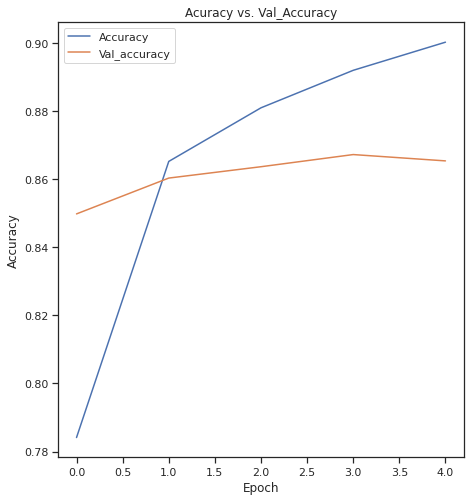

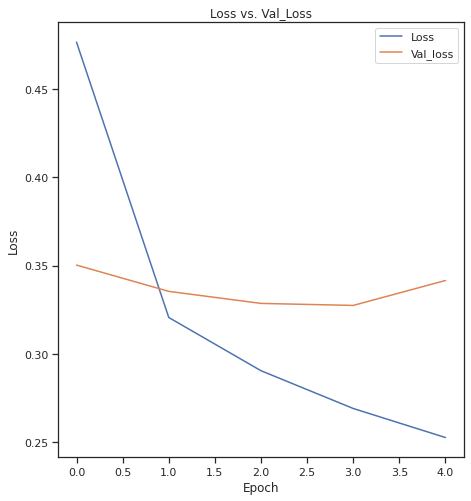

In [ ]:
# visualize accuracy vs loss
plot_model(details)

In [ ]:
# function to predict sentiment 
def predict_sentiment(text, model):
  # must tokenize and pad input text to match model 
  tw = tokenizer.texts_to_sequences([text])
  tw = pad_sequences(tw, maxlen=max_len)
  prediction = model.predict(tw).round().item()
  if prediction < 1:
    print('Predicted label:', [prediction], 'Negative Sentiment')
  else:
    print('Predicted label:', [prediction], 'Positive Sentiment')

In [ ]:
test_sentence1 = 't has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil' # positive from above 
predict_sentiment(test_sentence1,model)

1/1 [==============================] - 0s 107ms/step
Predicted label: [1.0] Positive Sentiment


In [ ]:
test_sentence2 = 'took daughter dinner mentioned ride school morning asked meant told given ride school morning recollection taking school leaving house coming home surreal experience reading reviews decided stop taking medication help sleep driving black scary'
predict_sentiment(test_sentence2, model) # negative from above 

1/1 [==============================] - 0s 21ms/step
Predicted label: [0.0] Negative Sentiment


In [ ]:
import pickle 

filename = 'sentiment_model2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
  
